In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv('traffic_violaions.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52966 non-null  object 
 1   stop_time           52965 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       49580 non-null  object 
 4   driver_age_raw      49588 non-null  float64
 5   driver_age          49346 non-null  float64
 6   driver_race         49581 non-null  object 
 7   violation_raw       49581 non-null  object 
 8   violation           49581 non-null  object 
 9   search_conducted    52965 non-null  object 
 10  search_type         2085 non-null   object 
 11  stop_outcome        49581 non-null  object 
 12  is_arrested         49581 non-null  object 
 13  stop_duration       49581 non-null  object 
 14  drugs_related_stop  52965 non-null  object 
dtypes: float64(3), object(12)
memory usage: 6.1+ MB


In [21]:
df.isna()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52961,False,False,True,True,True,True,True,True,True,False,True,True,True,True,False
52962,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
52963,False,False,True,True,True,True,True,True,True,False,True,True,True,True,False
52964,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False


In [22]:
df

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52961,10/5/2011,1:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52962,10/5/2011,6:43,NaN,M,1986.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
52963,10/5/2011,6:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52964,10/5/2011,7:19,NaN,F,1986.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [23]:
df1 = df.copy(deep=True)
df1.drop(columns = ['country_name','search_type','driver_age_raw'], inplace=True)
df1.dropna(subset = ['driver_gender'], inplace = True)

In [24]:
df2 = df1.copy(deep=True)
df2['driver_age'] = df2['driver_age'].fillna(df.groupby('driver_gender')['driver_age'].transform('median'))

In [25]:
df2

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...
52956,10/4/2011,22:22,M,32.0,White,Speeding,Speeding,False,Arrest Driver,True,0-15 Min,False
52958,10/4/2011,22:36,F,44.0,Hispanic,Speeding,Speeding,False,Citation,False,0-15 Min,False
52959,10/4/2011,23:25,F,20.0,Black,Speeding,Speeding,False,Citation,False,0-15 Min,False
52962,10/5/2011,6:43,M,25.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [53]:
data = df2.copy(deep=True)
# pd.to_datetime(data['stop_time'])
data['stop_hour'] = pd.to_datetime(data['stop_time'], format = '%H:%M').dt.hour

# data['stop_duration'].value_counts()
data['stop_duration'] = data['stop_duration'].map({'0-15 Min':7.5,'16-30 Min':23,'30+ Min':45})
stop_duration_based_on_race = data.groupby('driver_race')[['stop_duration']].mean()

data.search_conducted = data.search_conducted.replace(to_replace=[True, False], value=[1, 0])
data.drugs_related_stop = data.drugs_related_stop.replace(to_replace=[True, False], value=[1, 0])
data['stop_date'] = pd.to_datetime(data['stop_date'])
data['stop_Year'] = pd.DatetimeIndex(data['stop_date']).year
yearly_data = data.groupby('stop_Year').sum(numeric_only=True)
yearly_data.reset_index(inplace = True)

search_conducted = len(data[data.search_conducted == True])
arrested_after_search = len(data[(data.search_conducted == True) & (data.is_arrested == True)])
arrested = ((arrested_after_search/search_conducted)*100)
not_arrested = (100-(arrested))

In [54]:
data

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_hour,stop_Year
0,2005-01-02,1:55,M,20.0,White,Speeding,Speeding,0,Citation,False,7.5,0,1,2005
1,2005-01-18,8:15,M,40.0,White,Speeding,Speeding,0,Citation,False,7.5,0,8,2005
2,2005-01-23,23:15,M,33.0,White,Speeding,Speeding,0,Citation,False,7.5,0,23,2005
3,2005-02-20,17:15,M,19.0,White,Call for Service,Other,0,Arrest Driver,True,23.0,0,17,2005
4,2005-03-14,10:00,F,21.0,White,Speeding,Speeding,0,Citation,False,7.5,0,10,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52956,2011-10-04,22:22,M,32.0,White,Speeding,Speeding,0,Arrest Driver,True,7.5,0,22,2011
52958,2011-10-04,22:36,F,44.0,Hispanic,Speeding,Speeding,0,Citation,False,7.5,0,22,2011
52959,2011-10-04,23:25,F,20.0,Black,Speeding,Speeding,0,Citation,False,7.5,0,23,2011
52962,2011-10-05,6:43,M,25.0,White,Speeding,Speeding,0,Citation,False,7.5,0,6,2011


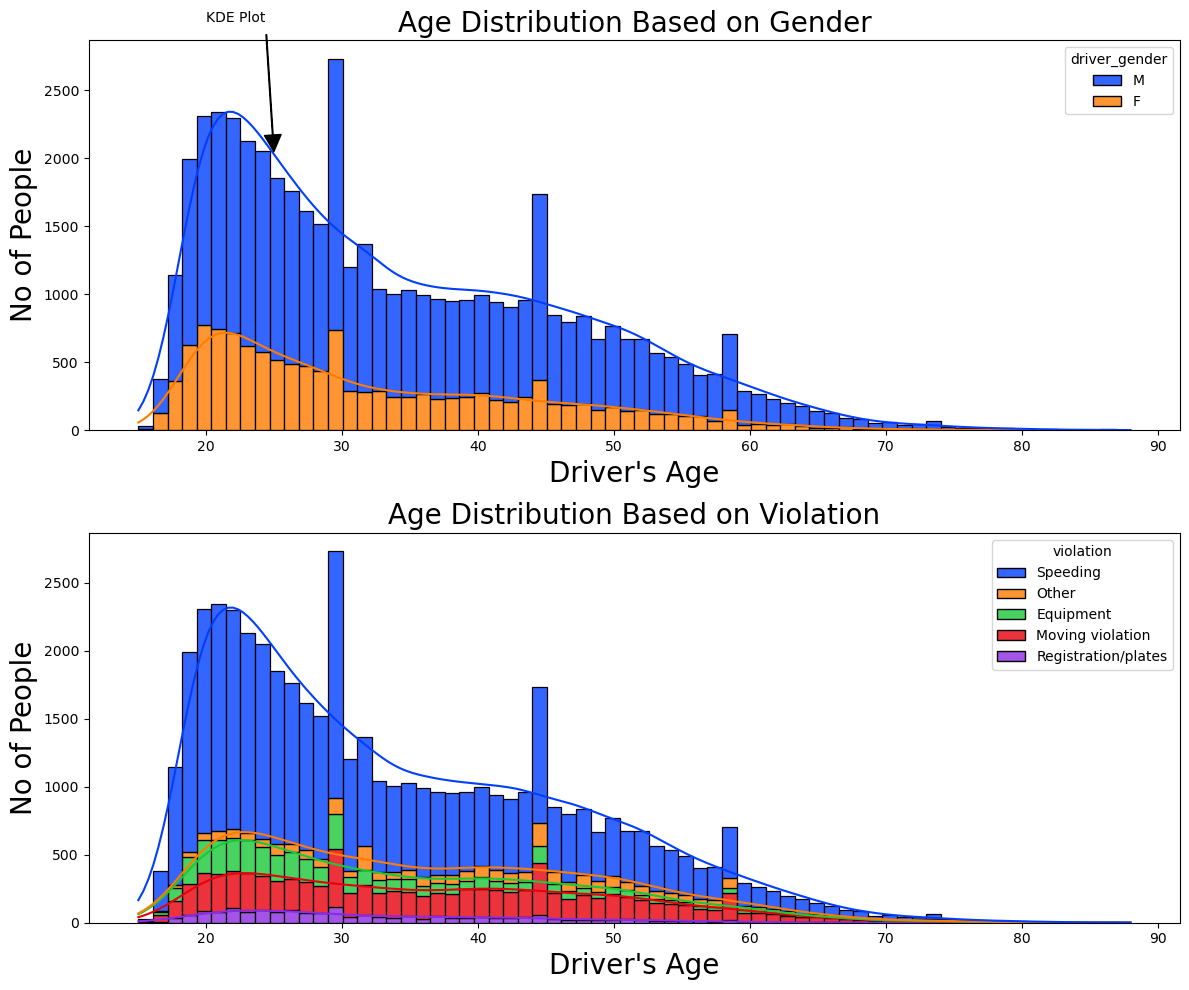

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot age distribution based on gender
sns.histplot(x='driver_age', hue='driver_gender', kde=True, data=data, multiple='stack', alpha=0.8, palette="bright", ax=axs[0])
axs[0].set_title('Age Distribution Based on Gender',fontsize=20)
axs[0].set_xlabel("Driver's Age",fontsize=20)
axs[0].set_ylabel("No of People",fontsize=20)
axs[0].annotate('KDE Plot', xy=(25, 2000), xytext=(20, 3000),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=0.5),fontsize=10)

# Plot age distribution based on violation
sns.histplot(x='driver_age', hue='violation', kde=True, data=data, multiple='stack', alpha=0.8, palette="bright", ax=axs[1])
axs[1].set_title('Age Distribution Based on Violation',fontsize=20)
axs[1].set_xlabel("Driver's Age",fontsize=20)
axs[1].set_ylabel("No of People",fontsize=20)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [56]:
# sum=0
# for i in ax.patches:
#     sum=sum+i.get_height()
#     print(i.get_x())
    
# print(sum)
# #     percentage = '{:.1f}%'.format(100 * i.get_height() / len(data.violation))
# #     x = i.get_x() + i.get_width() - 0.6
# #     y = i.get_height()+ 0.01 * len(data.violation)
# #     ax.annotate(percentage, (x, y), fontsize=20)

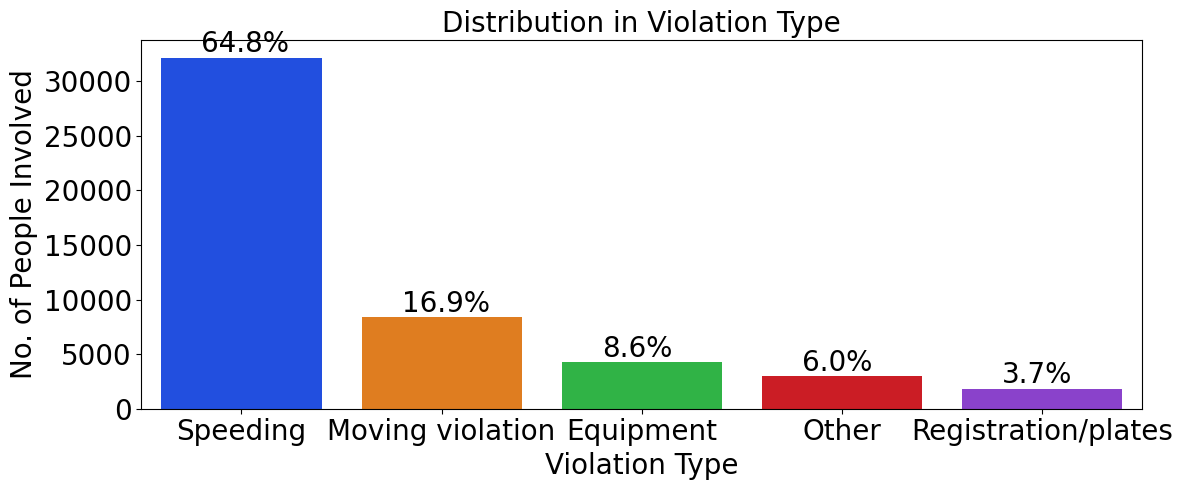

In [57]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x='violation', data=data, order=data.violation.value_counts().index, palette="bright")

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height() / len(data.violation))
    x = i.get_x() + i.get_width() - 0.6
    y = i.get_height()+ 0.01 * len(data.violation)
    ax.annotate(percentage, (x, y), fontsize=20)  # Increase fontsize here for annotations

plt.title("Distribution in Violation Type", fontsize=20)  # Increase fontsize here for title
plt.xlabel("Violation Type", fontsize=20)  # Increase fontsize here for x-axis label
plt.ylabel("No. of People Involved", fontsize=20)  # Increase fontsize here for y-axis label
plt.xticks(fontsize=20)  # Increase fontsize here for x-axis ticks
plt.yticks(fontsize=20)  # Increase fontsize here for y-axis ticks
plt.tight_layout()
plt.show()

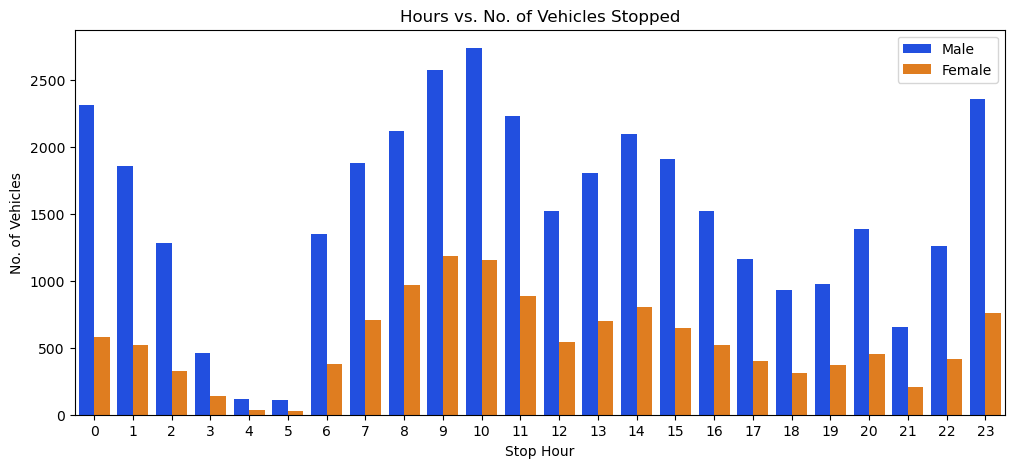

In [58]:
plt.figure(figsize = (12,5))
sns.countplot(x = data.stop_hour,data = data,hue = 'driver_gender', palette = "bright")
plt.title('Hours vs. No. of Vehicles Stopped')
plt.legend(['Male','Female'])
plt.xlabel("Stop Hour")
plt.ylabel("No. of Vehicles");


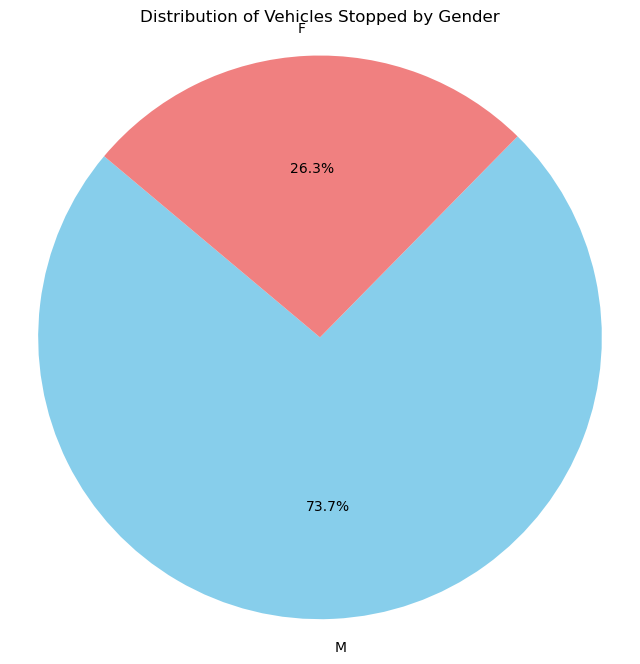

In [59]:

# Calculate the total number of vehicles stopped by gender
gender_distribution = data['driver_gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Vehicles Stopped by Gender')
plt.axis('equal')  # Ensures the pie chart is drawn as a circle
plt.show()


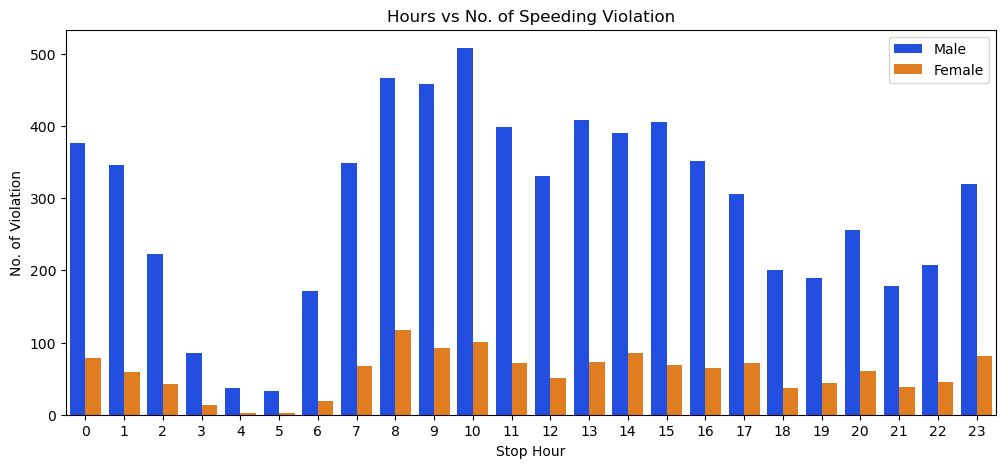

In [60]:
plt.figure(figsize = (12,5))
sns.countplot(x = data[data.violation == 'Moving violation'].stop_hour,data=data[data.violation == 'Moving violation'], 
              hue = 'driver_gender', palette = "bright")
plt.title('Hours vs No. of Speeding Violation')
plt.legend(['Male','Female'])
plt.xlabel("Stop Hour")
plt.ylabel("No. of Violation");

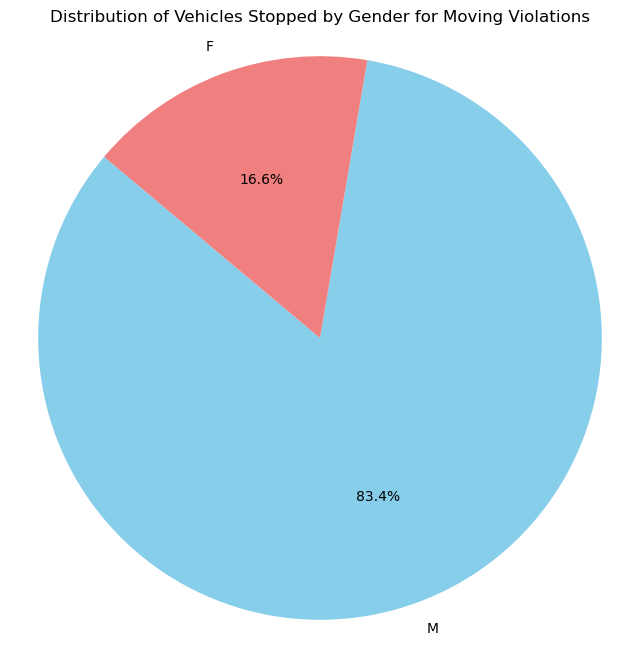

In [61]:
import matplotlib.pyplot as plt

# Calculate the distribution of genders for moving violations
gender_distribution = data[data['violation'] == 'Moving violation']['driver_gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Vehicles Stopped by Gender for Moving Violations')
plt.axis('equal')  # Ensures the pie chart is drawn as a circle
plt.show()


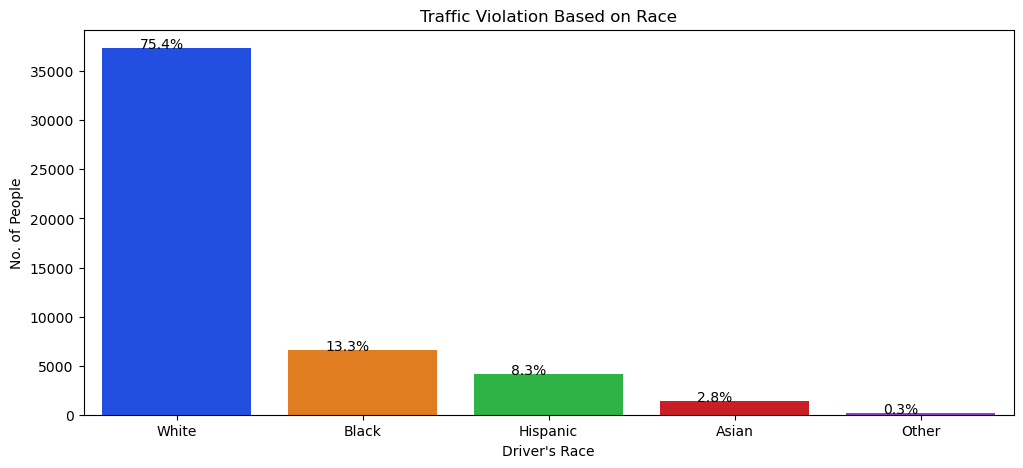

In [62]:
fig , ax = plt.subplots(figsize = (12,5))
ax = sns.countplot(x=data.driver_race, data=data, order = data.driver_race.value_counts().index,
                   linewidth = 0, palette = "bright")
for i in ax.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/len(data.driver_race))
    x = i.get_x()+i.get_width()-0.6
    y = i.get_height()
    ax.annotate(percentage, (x, y))
plt.title('Traffic Violation Based on Race')
plt.xlabel("Driver's Race")
plt.ylabel("No. of People");


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


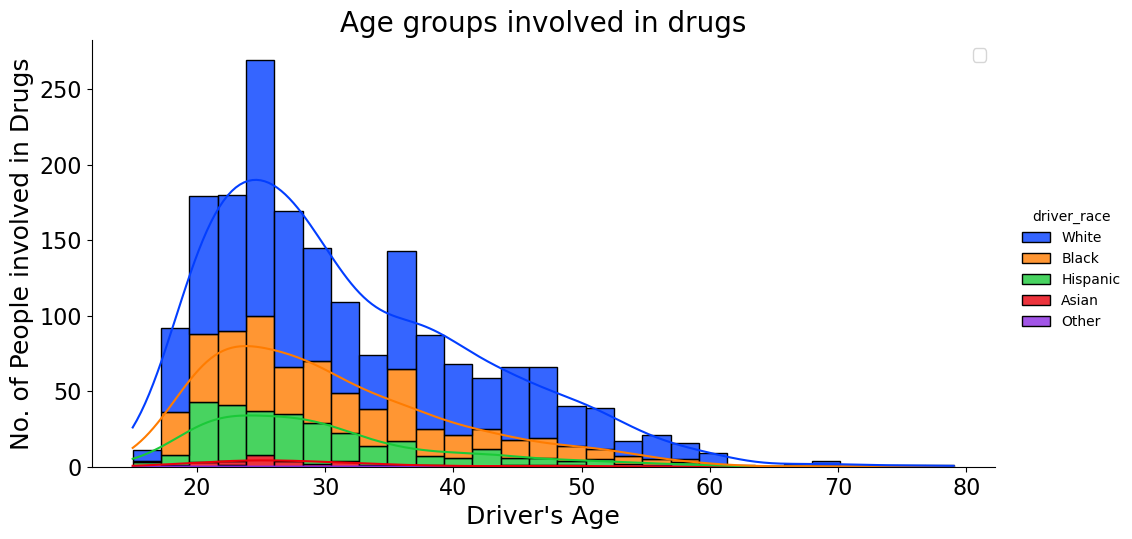

In [63]:
g = sns.displot(
    data=data[data['is_arrested']==True],
    x='driver_age',
    kde=True,
    hue='driver_race',
    multiple="stack",
    alpha=0.8,
    palette="bright",
    height=5,
    aspect=2
)

# Increase font sizes for title and axis labels using Matplotlib
plt.title('Age groups involved in drugs', fontsize=20)
plt.xlabel("Driver's Age", fontsize=18)
plt.ylabel("No. of People involved in Drugs", fontsize=18)

# Adjust tick parameters for both axes
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Adjust legend font size
plt.legend( title_fontsize='13', fontsize='12')

# Show plot
plt.show()

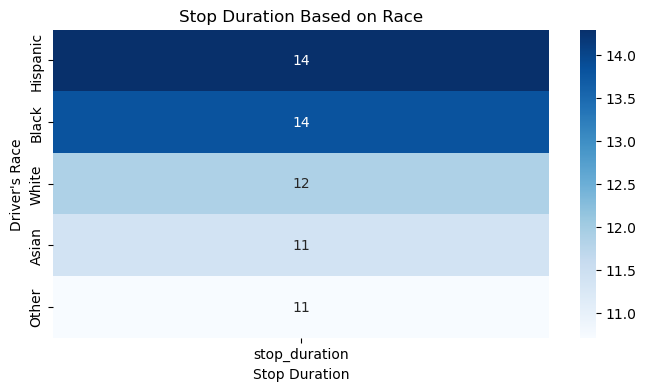

In [64]:
plt.figure(figsize = (8,4))
sns.heatmap(stop_duration_based_on_race.sort_values(by = ['stop_duration'], ascending=False), annot = True, cmap = "Blues");
plt.title("Stop Duration Based on Race")
plt.xlabel("Stop Duration")
plt.ylabel("Driver's Race");

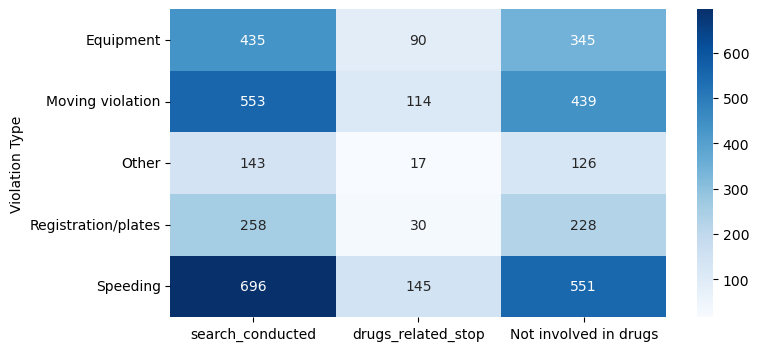

In [65]:
result = data.groupby('violation')[['search_conducted','drugs_related_stop','is_arrested']].sum(numeric_only=True)
result['Not involved in drugs'] = result['search_conducted']-result['drugs_related_stop']
plt.figure(figsize = (8,4))
sns.heatmap(result, annot = True, fmt = ".0f", cmap = "Blues");
plt.ylabel("Violation Type");


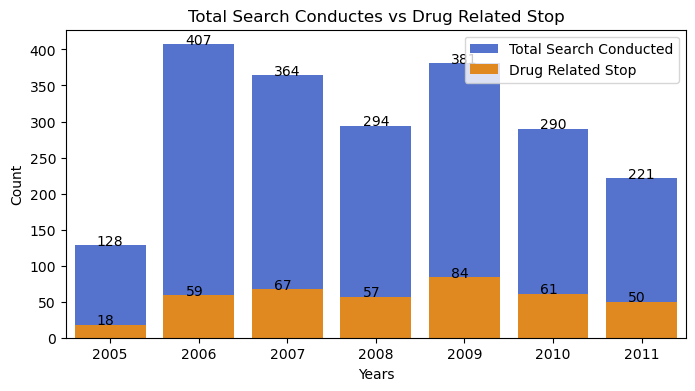

In [66]:
fig, ax = plt.subplots(figsize = (8,4))
sns.barplot(x = yearly_data.stop_Year, y = yearly_data.search_conducted,
            data = yearly_data,label = "Total Search Conducted", color = "royalblue")
sns.barplot(x = yearly_data.stop_Year, y = yearly_data.drugs_related_stop,
            data = yearly_data,label = "Drug Related Stop", color = "darkorange")
for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.55
    y = i.get_height()
    ax.annotate(count, (x, y))
ax.set_title("Total Search Conductes vs Drug Related Stop")
ax.set(xlabel = "Years", ylabel = "Count")
ax.legend(fontsize = '10');

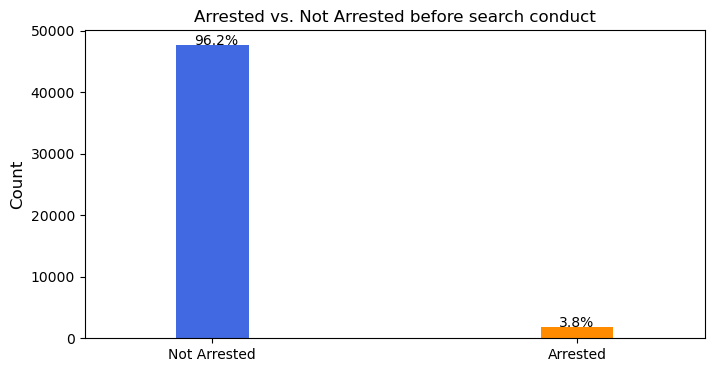

In [67]:
fig, ax = plt.subplots()
fig.canvas.draw()
data.is_arrested.value_counts().plot(kind="bar", width=0.2, figsize=(8, 4), color = ["royalblue","darkorange"])
plt.ylabel("Count", fontsize=12)
plt.title("Arrested vs. Not Arrested before search conduct")
for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(data.is_arrested))
    x = i.get_x() + i.get_width() - 0.15
    y = i.get_height()
    ax.annotate(percentage, (x, y))
ax.set_xticklabels(["Not Arrested","Arrested"], rotation = 0);

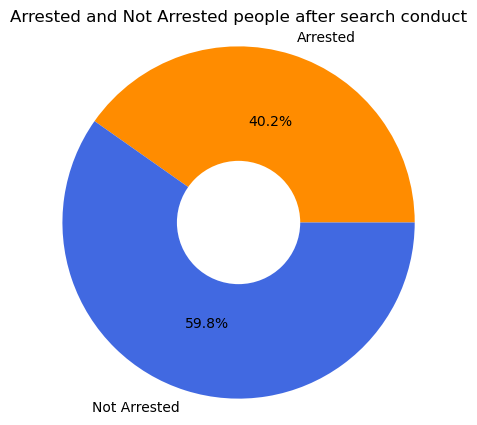

In [68]:
fig, ax = plt.subplots(figsize = (5,5))
ax.pie([arrested, not_arrested], labels = ('Arrested','Not Arrested'),
       autopct = '%1.1f%%', colors = ["darkorange","royalblue"])
centre_circle = plt.Circle((0,0), 0.35, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Arrested and Not Arrested people after search conduct');
ax.axis('equal');